In [ ]:
#uses LSTM t predict stock price

In [2]:
#import libraby
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [136]:
#stock
df = pd.read_csv("/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...,...
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.799057,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.969292,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.879601,133587600
2001,2019-12-16,69.250000,70.197502,69.245003,69.964996,69.041557,128186000


In [137]:
df.shape

(2003, 7)

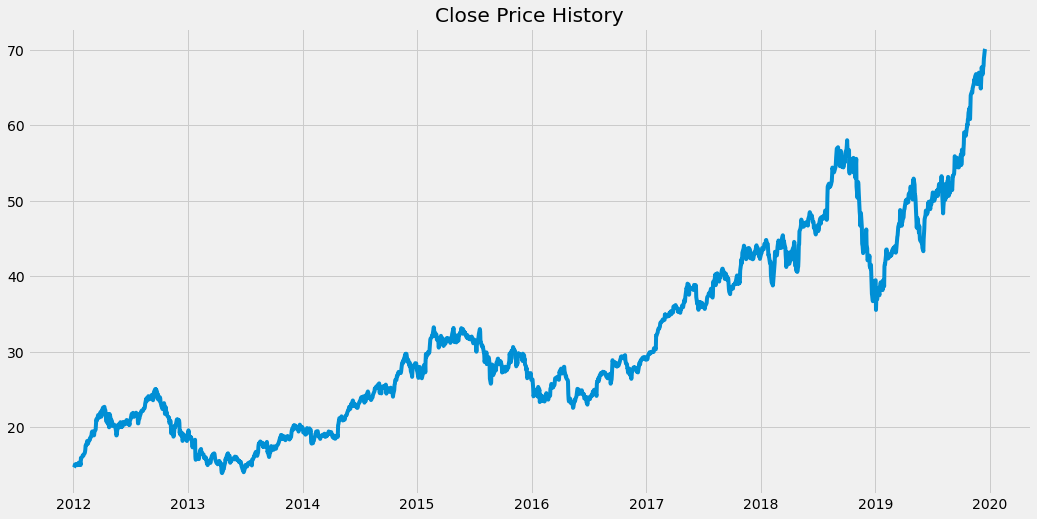

In [138]:
#Visualizing the closing price
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], label='Close Price History')

In [139]:
#Create a new dataframe with only close column
data = df.filter(["Close"])
#Convert dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1603

In [140]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0131651 ],
       [0.01457063],
       [0.01748986],
       ...,
       [0.97658262],
       [0.99755133],
       [1.        ]])

In [141]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.0131651 , 0.01457063, 0.01748986, 0.02026915, 0.01984304,
       0.02080338, 0.02036454, 0.0196268 , 0.01862192, 0.02173194,
       0.02453667, 0.02367173, 0.01893356, 0.02345549, 0.01900353,
       0.03569839, 0.03440732, 0.03609271, 0.03973694, 0.04194383,
       0.04175942, 0.04107891, 0.04397904, 0.04670743, 0.0497984 ,
       0.05479095, 0.0652785 , 0.0654375 , 0.07127595, 0.07563886,
       0.0681405 , 0.07102789, 0.07097067, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600557, 0.09214292, 0.09661394,
       0.09790501, 0.0983566 , 0.09071196, 0.08886754, 0.08914104,
       0.09632779, 0.09835024, 0.10269409, 0.11293359, 0.12659476,
       0.12403805, 0.12404441, 0.13392141, 0.13701237, 0.1348118 ,
       0.13280208, 0.13070964, 0.13766104, 0.14243104, 0.14442806])]
[0.139492723007876]

[array([0.0131651 , 0.01457063, 0.01748986, 0.02026915, 0.01984304,
       0.02080338, 0.02036454, 0.0196268 , 0.01862192, 0.02173194,
       0.02453667, 0.02367173, 0.0189

In [142]:
#Covert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [143]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [153]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

In [154]:
#Compile the model
model.compile(loss='mean_squared_error',optimizer='adam')

In [155]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=2)

1543/1543 - 39s - loss: 7.1172e-04


In [156]:
#Create the testing dataset
test_data = scaled_data[training_data_len - 60 : , :]
#Create datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i,0])

In [157]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [158]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(400, 60, 1)

In [159]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [160]:
#Get the root mean squared error RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.5751298781727232

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


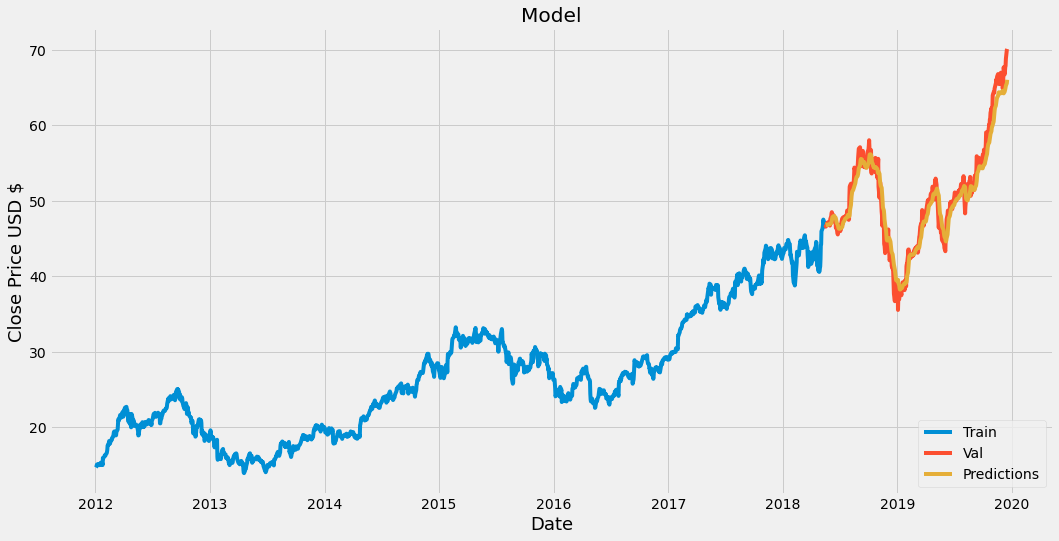

In [163]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price USD $", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc="lower right")
plt.show()

In [164]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.854595
2018-05-18,46.577499,46.863506
2018-05-21,46.907501,46.819942
2018-05-22,46.790001,46.801048
2018-05-23,47.090000,46.783215
...,...,...
2019-12-11,67.692497,64.776398
2019-12-12,67.864998,65.002441
2019-12-13,68.787498,65.236916


In [165]:
apple_quote = pd.read_csv("/AAPL.csv")
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price
last_60_day = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_day)
X_test = []
X_test.append(last_60_days_scaled)
#Convert to np array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[66.48932]]
